# Atividade 2 - Regressão Linear
### Nome: Alessandro Souza Silva, Matrícula: 399941

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Implementação da Regressão Linear e das Métricas de Avaliação (RSS,RSE,R2,MAE,MSE)

In [10]:
class RegressaoLinearSimples(object):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        
        self.X = X
        self.y = y
        
        x_mean = np.mean(self.X)
        y_mean = np.mean(self.y)
        
        self.b1 = np.sum((self.X - x_mean)*(self.y - y_mean))
        self.b1 = self.b1/np.sum((self.X - x_mean)**2)
        
        self.b0 = y_mean - (self.b1*x_mean)
        
    def predict(self, _X):
        
        self._y = self.b0 + self.b1*_X
        return self._y

class RegressaoLinearMultipla(object):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        
        bias = np.ones((X.shape[0],1))
        self.X = np.concatenate( (bias,X),axis=1)
        self.y = y
        
        self.b_ = self.X.T.dot( self.X )
        self.b_ = np.linalg.inv(self.b_)
        self.b_ = self.b_.dot(self.X.T)
        self.b_ = self.b_.dot(self.y)
        
    def predict(self, _X):
        
        bias = np.ones((_X.shape[0],1))
        _X = np.concatenate( (bias,_X),axis=1)
        
        _y = np.dot(_X, self.b_.T)
        
        return _y

def RSS( y_true, y_predict ):
    return np.sum( np.power((y_true-y_predict),2) )

def RSE( y_true, y_predict ):  
    n = y_true.shape[0]
    rss = RSS(y_true, y_predict)
    return np.power(( rss/(n-2) ),0.5)

def R2( y_true, y_predict ):
    y_mean = np.mean(y_true)
    tss = np.sum( np.power((y_true-y_mean),2) )
    rss = RSS( y_true, y_predict )
    return 1 - ( rss/tss )

def MAE( y_true, y_predict ):
    n = y_true.shape[0]
    return np.sum( abs(y_true-y_predict) ) / n

def MSE( y_true, y_predict ):
    n = y_true.shape[0]
    return np.sum( np.power(y_true-y_predict,2) ) / n


### Leitura dos dados utilizando a biblioteca pandas

In [3]:
import pandas as pd
data = pd.read_fwf("Data/housing.data")

In [4]:
data.head()

,CRIM,ZN,INDUS,C,NOX,RM,AGE,DIS,RA,TAX,PTRA,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Embaralhando as amostras com seus valores alvo

In [5]:
data = data.sample(frac=1, random_state=40)
data.head()

,CRIM,ZN,INDUS,C,NOX,RM,AGE,DIS,RA,TAX,PTRA,B,LSTAT,MEDV
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,4,666.0,20.2,395.43,11.48,22.7
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61,30.3
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233.0,17.9,396.90,30.81,14.4
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,4,666.0,20.2,0.32,17.44,13.4
469,3.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,4,666.0,20.2,396.90,14.76,20.1


### Utilizando apenas a variável LSTAT como atributo preditor e a variável MEDV como atributo alvo

In [6]:
X = data.LSTAT
y = data.MEDV

### Dividindo o conjunto de dados em 80% para treino e 20% para teste utilizando o sklearn

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

### Criando e treinando um modelo de Regressão Linear Simples

In [8]:
rls = RegressaoLinearSimples()

rls.fit(X_train,y_train)

### Reportando MSE e R2 score para o conjunto de treino

In [11]:
y_pred_train = rls.predict(X_train)
print("Conjuto de treino")
print("MSE: ",MSE(y_train,y_pred_train))
print("R2: ",R2(y_train,y_pred_train))

Conjuto de treino
MSE:  35.37430617110251
R2:  0.5360524503033299


### Reportando MSE e R 2 score para o conjunto de teste

In [12]:
y_pred_test = rls.predict(X_test)
print("Conjuto de teste")
print("MSE: ",MSE(y_test,y_pred_test))
print("R2: ",R2(y_test,y_pred_test))

Conjuto de teste
MSE:  51.90140276254096
R2:  0.5348957403921226


### Plotando um gráfico com LSTAT no eixo X e MEDV no eixo Y onde é apresentado tanto os dados originais (conjunto inteiro) como pontos quanto a reta da regressão linear

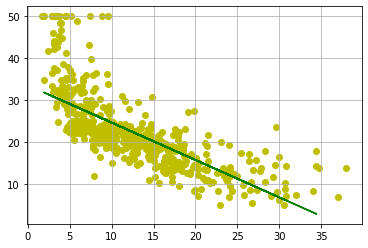

In [13]:
plt.scatter(X,y,c='y')
plt.plot(X_test,y_pred_test,c='g')
plt.grid()
plt.show()

### Plotando um gráfico onde os valores preditos para o conjunto de treino estão no eixo X e os valores alvo originais estão no eixo Y. Também é plotado a reta Y=X para comparação.

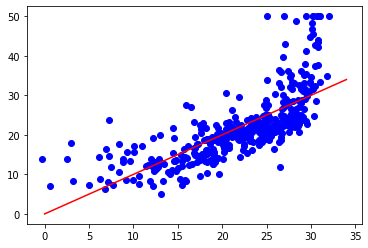

In [14]:
plt.scatter(y_pred_train,y_train,c='b')
plt.plot(range(35),range(35),c='r')
plt.show()

### Adicionando o termo LSTAT2 e LSTAT3 ao conjunto de dados e refazendo toda  a análise anterior

In [15]:
data["LSTAT2"] = [ np.power(x,2) for x in data.LSTAT]
data["LSTAT3"] = [ np.power(x,3) for x in data.LSTAT]
data.head()

,CRIM,ZN,INDUS,C,NOX,RM,AGE,DIS,RA,TAX,PTRA,B,LSTAT,MEDV,LSTAT2,LSTAT3
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,4,666.0,20.2,395.43,11.48,22.7,131.7904,1512.953792
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61,30.3,74.1321,638.277381
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233.0,17.9,396.90,30.81,14.4,949.2561,29246.580441
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,4,666.0,20.2,0.32,17.44,13.4,304.1536,5304.438784
469,3.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,4,666.0,20.2,396.90,14.76,20.1,217.8576,3215.578176


#### Análise com o termo LSTAT2

In [16]:
X = data.loc[:,["LSTAT","LSTAT2"]]
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

rlm = RegressaoLinearMultipla()

rlm.fit(X_train,y_train)

In [17]:
y_pred_train = rlm.predict(X_train)
print("Conjuto de treino")
print("MSE: ",MSE(y_train,y_pred_train))
print("R2: ",R2(y_train,y_pred_train))
print()

y_pred_test = rlm.predict(X_test)
print("Conjuto de teste")
print("MSE: ",MSE(y_test,y_pred_test))
print("R2: ",R2(y_test,y_pred_test))

Conjuto de treino
MSE:  28.190964763941444
R2:  0.6302647191847901

Conjuto de teste
MSE:  39.537840484020684
R2:  0.6456893832147648


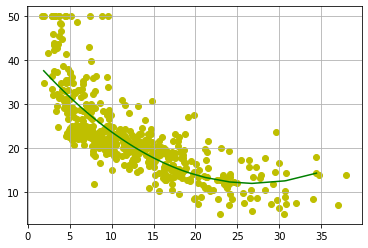

In [18]:
X_test = X_test.sort_values(by=['LSTAT'])
y_pred_test = rlm.predict(X_test)

plt.scatter(X.LSTAT,y,c='y')
plt.plot(X_test.LSTAT,y_pred_test,c='g')
plt.grid()
plt.show()

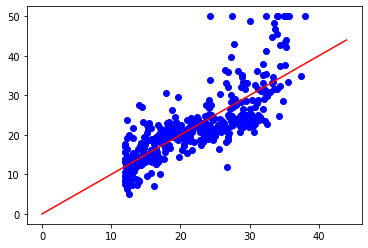

In [19]:
plt.scatter(y_pred_train,y_train,c='b')
plt.plot(range(45),range(45),c='r')
plt.show()

#### Análise com o termo LSTA3

In [20]:
X = data.loc[:,["LSTAT","LSTAT2","LSTAT3"]]
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

rlm = RegressaoLinearMultipla()

rlm.fit(X_train,y_train)

In [21]:
y_pred_train = rlm.predict(X_train)
print("Conjuto de treino")
print("MSE: ",MSE(y_train,y_pred_train))
print("R2: ",R2(y_train,y_pred_train))
print()

y_pred_test = rlm.predict(X_test)
print("Conjuto de teste")
print("MSE: ",MSE(y_test,y_pred_test))
print("R2: ",R2(y_test,y_pred_test))

Conjuto de treino
MSE:  26.91670346194065
R2:  0.6469771433345959

Conjuto de teste
MSE:  37.1873365522604
R2:  0.666752964017937


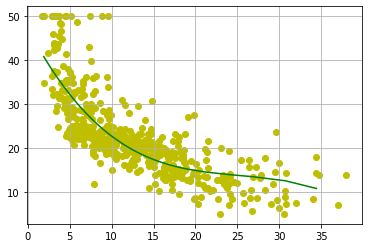

In [22]:
X_test = X_test.sort_values(by=['LSTAT'])
y_pred_test = rlm.predict(X_test)

plt.scatter(X.LSTAT,y,c='y')
plt.plot(X_test.LSTAT,y_pred_test,c='g')
plt.grid()
plt.show()

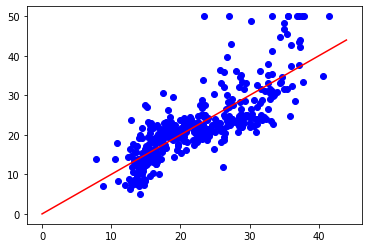

In [23]:
plt.scatter(y_pred_train,y_train,c='b')
plt.plot(range(45),range(45),c='r')
plt.show()